# Read SAS Files
The following data can be found here:
https://wwwn.cdc.gov/nchs/nhanes/

In [1]:
# Read SAS file
import pandas as pd

In [2]:
# NHANES 2005-2006 vaccination Immunization
nhanes0506_Vaccination = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/IMQ_D.XPT", format = "xport")

In [3]:
# NHANES 2005-2006 core antibody surface antigen
nhanes0506_BG = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/HEPBD_D.XPT", format = "xport" )

In [4]:
# NHANES 2005-2006 surface antibody
nhanes0506_Antibody = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/HEPB_S_D.XPT", format = "xport")

In [5]:
nhanes0506_Vaccination = nhanes0506_Vaccination[['SEQN','IMQ020']]

In [6]:
nhanes0506_BG = nhanes0506_BG[['SEQN','LBXHBC','LBDHBG']]

In [7]:
nhanes0506_Antibody

,SEQN,LBXHBS
0,31128.0,2.0
1,31129.0,1.0
2,31130.0,NaN
3,31131.0,2.0
4,31132.0,2.0
...,...,...
9089,41469.0,1.0
9090,41471.0,2.0
9091,41472.0,1.0
9092,41473.0,2.0


In [8]:
nhanes0506_No_vaccination = nhanes0506_Vaccination[(nhanes0506_Vaccination['IMQ020']==3.0) | (nhanes0506_Vaccination['IMQ020']==7.0) | (nhanes0506_Vaccination['IMQ020']==9.0)]

In [9]:
nhanes0506_No_vaccination

,SEQN,IMQ020
2,31129.0,3.0
3,31130.0,3.0
4,31131.0,3.0
5,31132.0,3.0
7,31134.0,3.0
...,...,...
10334,41461.0,9.0
10337,41464.0,3.0
10339,41466.0,3.0
10341,41468.0,3.0


In [10]:
nhanes0506_club_1 = pd.merge(nhanes0506_No_vaccination, nhanes0506_Antibody, on="SEQN", how = "left")

In [11]:
nhanes0506_club_2 = pd.merge(nhanes0506_club_1, nhanes0506_BG, on="SEQN", how = "left")

In [12]:
import pandas as pd
import pandas.io.sql as sqlio

In [13]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [14]:
from pandasql import sqldf

In [15]:
query = '''
SELECT SEQN, (CASE WHEN LBXHBC = 1.0 THEN 'Positive' WHEN LBXHBC = 2.0 THEN 'Negative' WHEN LBXHBC IS NULL THEN 'Missing' END) AS Core_Antibody,
(CASE WHEN LBDHBG = 1.0 THEN 'Positive' WHEN LBDHBG = 2.0 THEN 'Negative' WHEN LBDHBG IS NULL THEN 'Missing' END) AS Surface_Antigen,
(CASE WHEN LBXHBS = 1.0 THEN 'Positive' WHEN LBXHBS = 2.0 THEN 'Negative' WHEN LBXHBS IS NULL THEN 'Missing' END) AS Surface_Antibody,
(CASE WHEN IMQ020 = 3.0 THEN 'No Doses' WHEN IMQ020 = 7.0 THEN 'Refused' WHEN IMQ020 = 9.0 THEN "Don't know" END) AS Vaccination
FROM nhanes0506_club_2
'''

In [16]:
nhanes0506_final = sqldf(query)

In [17]:
nhanes0506_final[nhanes0506_final['Surface_Antigen'] == 'Positive']

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination
167,31527.0,Positive,Positive,Negative,No Doses
701,32770.0,Positive,Positive,Negative,No Doses
991,33489.0,Positive,Positive,Negative,No Doses
1002,33519.0,Positive,Positive,Negative,No Doses
1587,34851.0,Positive,Positive,Negative,No Doses
2055,35882.0,Positive,Positive,Negative,No Doses
2549,37036.0,Positive,Positive,Negative,No Doses
2792,37606.0,Positive,Positive,Negative,No Doses
3157,38444.0,Positive,Positive,Negative,No Doses
3170,38469.0,Positive,Positive,Negative,No Doses


In [18]:
query2 = '''
SELECT SEQN, Core_Antibody, Surface_Antigen, Surface_Antibody, Vaccination, 
(CASE WHEN Surface_Antigen = 'Positive' THEN 'HBV Infection' WHEN (Surface_Antibody = 'Positive') THEN 'Vaccine Immunity' 
WHEN (Surface_Antigen = 'Negative' and Core_Antibody ='Negative' and Surface_Antibody ='Negative') THEN 'No Infection'
WHEN (Core_Antibody = 'Positive' and Surface_Antibody = 'Negative') THEN 'HBV Exposure' END) AS resp_2 
FROM nhanes0506_final
'''

In [19]:
nhanes0506_final_resp = sqldf(query2)

In [20]:
nhanes0506_final_resp[nhanes0506_final_resp['resp_2'].isna()]

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2
1,31130.0,Missing,Missing,Missing,No Doses,None
5,31135.0,Missing,Missing,Missing,Don't know,None
6,31136.0,Missing,Missing,Missing,No Doses,None
26,31188.0,Missing,Missing,Missing,Don't know,None
33,31197.0,Missing,Missing,Missing,No Doses,None
...,...,...,...,...,...,...
4493,41426.0,Missing,Missing,Missing,Don't know,None
4496,41429.0,Missing,Missing,Missing,No Doses,None
4498,41431.0,Missing,Missing,Missing,No Doses,None
4502,41441.0,Missing,Missing,Missing,Don't know,None


In [21]:
# NHANES 2017-2018 Hepatitis ever told
#nhanes9920_evertold = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/1999-2000/HEQ_H.XPT", format = "xport")

In [22]:
#nhanes1314_evertold = nhanes1314_evertold[['SEQN','HEQ010']]

In [23]:
# left outer join prior data with evertold
#nhanes1314_final_resp_comb = pd.merge(nhanes1314_final_resp, nhanes1314_evertold, on="SEQN", how = "left")

In [24]:
#nhanes1314_final_resp_comb

In [25]:
#query3 = '''
#SELECT SEQN, Core_Antibody, Surface_Antigen, Surface_Antibody, Vaccination, resp, HEQ010,
#(CASE WHEN resp IS NULL and HEQ010 = 1.0 THEN 'HBV Infection' WHEN resp IS NULL and HEQ010 = 2.0 THEN 'No Infection' ELSE resp END) AS resp_2
#FROM nhanes1314_final_resp_comb
#'''

In [26]:
#nhanes9920_final_resp_data = sqldf(query3)

In [27]:
nhanes0506_HBV = nhanes0506_final_resp[(nhanes0506_final_resp['resp_2']=='HBV Infection') | (nhanes0506_final_resp['resp_2']=='No Infection')]

In [28]:
nhanes0506_HBV

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2
2,31131.0,Negative,Negative,Negative,No Doses,No Infection
3,31132.0,Negative,Negative,Negative,No Doses,No Infection
4,31134.0,Negative,Negative,Negative,No Doses,No Infection
7,31149.0,Negative,Negative,Negative,No Doses,No Infection
8,31150.0,Negative,Negative,Negative,No Doses,No Infection
...,...,...,...,...,...,...
4512,41461.0,Negative,Negative,Negative,Don't know,No Infection
4513,41464.0,Negative,Negative,Negative,No Doses,No Infection
4514,41466.0,Negative,Negative,Negative,No Doses,No Infection
4515,41468.0,Negative,Negative,Negative,No Doses,No Infection


In [29]:
# NHANES 2005-2006 Demographic Variable
nhanes0506_Demographic = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/DEMO_D.XPT", format = "xport")

In [30]:
#changed columns 'RIDRETH1','DMQMILIT','DMDBORN', deleted 'DMQADFC' 
Demographic_Variables = ['SEQN','SDDSRVYR','RIAGENDR','RIDAGEYR','RIDRETH1','DMQMILIT','DMDBORN','DMDCITZN',
                        'DMDYRSUS','DMDEDUC2','DMDMARTL','WTINT2YR','WTMEC2YR','SDMVPSU','SDMVSTRA','INDFMPIR']

In [31]:
nhanes0506_Demographic = nhanes0506_Demographic[Demographic_Variables]

In [32]:
nhanes0506_HBV_Demo = pd.merge(nhanes0506_HBV, nhanes0506_Demographic, on="SEQN", how = "left")

In [33]:
nhanes0506_HBV_Demo

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH1,...,DMDBORN,DMDCITZN,DMDYRSUS,DMDEDUC2,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR
0,31131.0,Negative,Negative,Negative,No Doses,No Infection,4.0,2.0,44.0,4.0,...,1.0,1.0,NaN,4.0,1.0,26457.708180,26770.584605,1.0,48.0,4.65
1,31132.0,Negative,Negative,Negative,No Doses,No Infection,4.0,1.0,70.0,3.0,...,1.0,1.0,NaN,5.0,1.0,32961.509920,35315.538900,2.0,52.0,5.00
2,31134.0,Negative,Negative,Negative,No Doses,No Infection,4.0,1.0,73.0,3.0,...,1.0,1.0,NaN,3.0,1.0,43718.506372,44231.167252,2.0,48.0,NaN
3,31149.0,Negative,Negative,Negative,No Doses,No Infection,4.0,2.0,85.0,3.0,...,1.0,1.0,NaN,2.0,2.0,23813.234506,25998.279203,2.0,52.0,0.05
4,31150.0,Negative,Negative,Negative,No Doses,No Infection,4.0,1.0,79.0,3.0,...,1.0,1.0,NaN,3.0,3.0,15391.933002,15572.425031,2.0,44.0,1.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,41461.0,Negative,Negative,Negative,Don't know,No Infection,4.0,1.0,85.0,3.0,...,1.0,1.0,NaN,1.0,1.0,9933.383239,10354.487647,1.0,55.0,1.56
3091,41464.0,Negative,Negative,Negative,No Doses,No Infection,4.0,2.0,60.0,3.0,...,1.0,1.0,NaN,3.0,1.0,53648.098507,62165.833559,1.0,44.0,3.73
3092,41466.0,Negative,Negative,Negative,No Doses,No Infection,4.0,2.0,58.0,5.0,...,1.0,1.0,NaN,2.0,2.0,90838.762471,94307.125120,1.0,46.0,1.34
3093,41468.0,Negative,Negative,Negative,No Doses,No Infection,4.0,2.0,66.0,1.0,...,1.0,1.0,NaN,1.0,2.0,9340.308808,7722.634231,1.0,53.0,1.78


In [34]:
nhanes0506_Insurance = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/HIQ_D.XPT", format = "xport")

In [35]:
Insurance_Variables = ['SEQN','HIQ011','HIQ031A','HIQ031B','HIQ031C','HIQ031D','HIQ031E','HIQ031F','HIQ031G','HIQ031H','HIQ031I','HIQ031J','HIQ031AA','HIQ260','HIQ105','HIQ270','HIQ210']

In [36]:
nhanes0506_Insurance = nhanes0506_Insurance[Insurance_Variables]

In [37]:
nhanes0506_HBV_Demo_Insurance = pd.merge(nhanes0506_HBV_Demo, nhanes0506_Insurance, on="SEQN", how = "left")

In [38]:
#HID040,HIQ220 removing these as these are not included for 2005,6 data
query4 = '''
SELECT *, 
(CASE WHEN HIQ011 = 2.0 THEN 1 ELSE 0 END) AS No_Insurance,
(CASE WHEN HIQ011 = 1.0 and HIQ031A = 1.0 THEN 1 ELSE 0 END) AS Private_Insurance,
(CASE WHEN HIQ011 = 1.0 and (HIQ031A IS NOT NULL OR HIQ031B IS NOT NULL OR HIQ031C IS NOT NULL OR HIQ031D IS NOT NULL OR 
HIQ031E IS NOT NULL) THEN 1 ELSE 0 END) Governement_Insurance
FROM nhanes0506_HBV_Demo_Insurance
'''

In [39]:
nhanes0506_HBV_Demo_Insurance = sqldf(query4)

In [40]:
nhanes0506_HBV_Demo_Insurance = nhanes0506_HBV_Demo_Insurance.drop(columns=['HIQ011','HIQ031A','HIQ031B','HIQ031C','HIQ031D','HIQ031E','HIQ031F','HIQ031G','HIQ031H','HIQ031I','HIQ031J','HIQ031AA','HIQ260','HIQ105','HIQ270','HIQ210'])

In [41]:
nhanes0506_HBV_Demo_Insurance

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH1,...,DMDEDUC2,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR,No_Insurance,Private_Insurance,Governement_Insurance
0,31131.0,Negative,Negative,Negative,No Doses,No Infection,4.0,2.0,44.0,4.0,...,4.0,1.0,26457.708180,26770.584605,1.0,48.0,4.65,0,0,1
1,31132.0,Negative,Negative,Negative,No Doses,No Infection,4.0,1.0,70.0,3.0,...,5.0,1.0,32961.509920,35315.538900,2.0,52.0,5.00,0,0,1
2,31134.0,Negative,Negative,Negative,No Doses,No Infection,4.0,1.0,73.0,3.0,...,3.0,1.0,43718.506372,44231.167252,2.0,48.0,NaN,0,0,1
3,31149.0,Negative,Negative,Negative,No Doses,No Infection,4.0,2.0,85.0,3.0,...,2.0,2.0,23813.234506,25998.279203,2.0,52.0,0.05,0,0,1
4,31150.0,Negative,Negative,Negative,No Doses,No Infection,4.0,1.0,79.0,3.0,...,3.0,3.0,15391.933002,15572.425031,2.0,44.0,1.22,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,41461.0,Negative,Negative,Negative,Don't know,No Infection,4.0,1.0,85.0,3.0,...,1.0,1.0,9933.383239,10354.487647,1.0,55.0,1.56,0,0,1
3091,41464.0,Negative,Negative,Negative,No Doses,No Infection,4.0,2.0,60.0,3.0,...,3.0,1.0,53648.098507,62165.833559,1.0,44.0,3.73,0,0,1
3092,41466.0,Negative,Negative,Negative,No Doses,No Infection,4.0,2.0,58.0,5.0,...,2.0,2.0,90838.762471,94307.125120,1.0,46.0,1.34,0,0,1
3093,41468.0,Negative,Negative,Negative,No Doses,No Infection,4.0,2.0,66.0,1.0,...,1.0,2.0,9340.308808,7722.634231,1.0,53.0,1.78,1,0,0


In [42]:
#Alcohol use
nhanes0506_Alcohol = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/ALQ_D.XPT", format = "xport")

In [43]:
nhanes0506_Alcohol = nhanes0506_Alcohol[['SEQN','ALQ130']]

In [44]:
nhanes0506 = pd.merge(nhanes0506_HBV_Demo_Insurance, nhanes0506_Alcohol, on="SEQN", how = "left")

In [45]:
#Healthcare Visits
nhanes0506_Healthcare = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/HUQ_D.XPT", format = "xport")

In [46]:
nhanes0506_Healthcare = nhanes0506_Healthcare [['SEQN','HUQ050']]

In [47]:
nhanes0506 = pd.merge(nhanes0506, nhanes0506_Healthcare, on="SEQN", how = "left")

In [48]:
#Dialysis
nhanes0506_Dialysis = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/KIQ_U_D.XPT", format = "xport")

In [49]:
nhanes0506_Dialysis = nhanes0506_Dialysis[['SEQN','KIQ025']]

In [50]:
nhanes0506 = pd.merge(nhanes0506, nhanes0506_Dialysis, on="SEQN", how = "left")

In [51]:
#Liver Condition
nhanes0506_Liver_Condition = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/MCQ_D.XPT", format = "xport")

In [52]:
nhanes0506_Liver_Condition = nhanes0506_Liver_Condition[['SEQN','MCQ160L']]

In [53]:
nhanes0506 = pd.merge(nhanes0506, nhanes0506_Liver_Condition, on="SEQN", how = "left")

In [54]:
#Blood Transfusion
nhanes0506_Blood_Transfusion = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/MCQ_D.XPT", format = "xport")

In [55]:
nhanes0506_Blood_Transfusion = nhanes0506_Blood_Transfusion[['SEQN','MCQ092']]

In [56]:
nhanes0506 = pd.merge(nhanes0506, nhanes0506_Blood_Transfusion, on="SEQN", how = "left")

In [57]:
#Healthcare Visits time
nhanes0506_Healthcare_time = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/HUQ_D.XPT", format = "xport")

In [58]:
nhanes0506_Healthcare_time = nhanes0506_Healthcare_time[['SEQN','HUQ060']]

In [59]:
nhanes0506 = pd.merge(nhanes0506, nhanes0506_Healthcare_time, on="SEQN", how = "left")

In [60]:
#Hepatitis C
nhanes0506_Hepatitis_C = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/HCQ_D.XPT", format = "xport")

In [61]:
nhanes0506_Hepatitis_C = nhanes0506_Hepatitis_C[['SEQN']]

In [62]:
import numpy as np
nhanes0506_Hepatitis_C['Hepatitis_C'] = "Yes"

In [63]:
nhanes0506 = pd.merge(nhanes0506, nhanes0506_Hepatitis_C, on="SEQN", how = "left")

In [64]:
Biochemistry_Variables = ['SEQN','LBXSATSI','LBDSALSI','LBXSASSI']

In [65]:
#Biochemistry_Variables
nhanes0506_Biochemistry_Variables = pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/BIOPRO_D.XPT", format = "xport")

In [66]:
nhanes0506_Biochemistry_Variables = nhanes0506_Biochemistry_Variables[Biochemistry_Variables]

In [67]:
nhanes0506 = pd.merge(nhanes0506, nhanes0506_Biochemistry_Variables, on="SEQN", how = "left")

In [68]:
#Platelet count
nhanes0506_Platelet_count= pd.read_sas("https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/CBC_D.XPT", format = "xport")

In [69]:
nhanes0506_Platelet_count = nhanes0506_Platelet_count[['SEQN','LBXPLTSI']]

In [70]:
nhanes0506 = pd.merge(nhanes0506, nhanes0506_Platelet_count, on="SEQN", how = "left")

In [71]:
nhanes0506 = nhanes0506[nhanes0506['RIDAGEYR']>=18]

In [72]:
pd.set_option('display.max_columns', None)
nhanes0506.head()

,SEQN,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDRETH1,DMQMILIT,DMDBORN,DMDCITZN,DMDYRSUS,DMDEDUC2,DMDMARTL,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDFMPIR,No_Insurance,Private_Insurance,Governement_Insurance,ALQ130,HUQ050,KIQ025,MCQ160L,MCQ092,HUQ060,Hepatitis_C,LBXSATSI,LBDSALSI,LBXSASSI,LBXPLTSI
0,31131.0,Negative,Negative,Negative,No Doses,No Infection,4.0,2.0,44.0,4.0,2.0,1.0,1.0,NaN,4.0,1.0,26457.708180,26770.584605,1.0,48.0,4.65,0,0,1,NaN,5.000000e+00,NaN,2.0,1.0,NaN,NaN,14.0,35.0,16.0,298.0
1,31132.0,Negative,Negative,Negative,No Doses,No Infection,4.0,1.0,70.0,3.0,1.0,1.0,1.0,NaN,5.0,1.0,32961.509920,35315.538900,2.0,52.0,5.00,0,0,1,1.0,3.000000e+00,NaN,2.0,2.0,NaN,NaN,31.0,50.0,29.0,225.0
2,31134.0,Negative,Negative,Negative,No Doses,No Infection,4.0,1.0,73.0,3.0,1.0,1.0,1.0,NaN,3.0,1.0,43718.506372,44231.167252,2.0,48.0,NaN,0,0,1,2.0,2.000000e+00,NaN,2.0,2.0,NaN,NaN,30.0,39.0,31.0,222.0
3,31149.0,Negative,Negative,Negative,No Doses,No Infection,4.0,2.0,85.0,3.0,2.0,1.0,1.0,NaN,2.0,2.0,23813.234506,25998.279203,2.0,52.0,0.05,0,0,1,NaN,3.000000e+00,NaN,2.0,1.0,NaN,NaN,19.0,37.0,28.0,198.0
4,31150.0,Negative,Negative,Negative,No Doses,No Infection,4.0,1.0,79.0,3.0,1.0,1.0,1.0,NaN,3.0,3.0,15391.933002,15572.425031,2.0,44.0,1.22,0,0,1,3.0,5.397605e-79,NaN,2.0,1.0,4.0,NaN,23.0,41.0,28.0,237.0


In [73]:
nhanes0506.shape

(2966, 35)

In [74]:
nhanes0506 = nhanes0506.rename(columns = {'SEQN':'Respondent_sequence_number',
                            'SDDSRVYR':'Data_release_cycle',
                            'RIAGENDR':'Gender',
                            'RIDAGEYR':'Age',
                            'RIDRETH1':'Race_Ethnicity',
                            'DMQMILIT':'Veteran_Status',
                            'DMDBORN':'Country_of_birth',
                            'DMDCITZN':'Citizenship_status',
                            'DMDYRSUS':'Length_of_time_in_US',
                            'DMDEDUC2':'Education_level',
                            'DMDMARTL':'Marital_status',
                            'WTINT2YR':'Two_year_interview_weight',
                            'WTMEC2YR':'Two_year_MEC_weight',
                            'SDMVPSU':'Masked_variance_PSU',
                            'SDMVSTRA':'Masked_variance_stratum',
                            'INDFMPIR':'Ratio_income_poverty',
                            'ALQ130':'Alcohol_1_year',
                            'HUQ050':'Health_care_1_year',
                            'KIQ025':'Dialysis_1_year',
                            'MCQ160L':'liver_condition',
                            'MCQ092':'Blood_Transfusion',
                            'HUQ060':'Last_Healthcare_Visit',
                            'Hepatitis_C':'Hepatitis_C',
                            'LBXSATSI':'ALT',
                            'LBDSALSI':'Albumin',
                            'LBXSASSI':'AST',
                            'LBXPLTSI':'Platelet_Count'})

In [75]:
nhanes0506[nhanes0506['resp_2']=='HBV Infection'].shape

(16, 35)

In [76]:
column_mapping = {
    'Gender':{1.0:"male", 2.0:"Female", np.nan:"missing"},
    'Race_Ethnicity':{1.0:"Mexican American",2.0:"Other Hispanic",3.0:"Non-Hispanic White",4.0:"Non-Hispanic Black",5.0:"Other Race - Including Multi-Racial"},
    'Veteran_Status':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know", np.nan:"missing"},
    'Country_of_birth':{1.0:"US", 2.0:"Mexico", 3.0:"Elsewhere",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Citizenship_status':{1.0:"Citizen",2.0:"Not a citizen",7.0:"Refused",9.0:"Don't know",np.nan:"Missing"},
    'Length_of_time_in_US':{1.0:"Less than 1 year",2.0:"1-5",3.0:"5-10",4.0:"10-15",5.0:"15-20",6.0:"20-30",7.0:"30-40",8.0:"40-50",9.0:"50 or more",77.0:"Refused",88.0:"Could not determine",99.0:"Don't know",np.nan:"Missing"},
    'Education_level':{1.0:"Less Than 9th Grade",2.0:"9-12th Grade",3.0:"High School Grad/GED or Equivalent",4.0:"Some College or AA degree",5.0:"College Graduate or above",7.0:"Refused",9.0:"Don't Know",np.nan:"Missing"},
    'Marital_status':{1.0:"Married",2.0:"Widowed",3.0:"Divorced",4.0:"Separated",5.0:"Never married",6.0:"Living with partner",77.0:"Refused",99.0:"Don't know",np.nan:"Missing"},
    'Health_care_1_year':{5.397605e-79:"None",1.0:"1",2.0:"2 to 3",3.0:"4 to 9",4.0:"10 to 12",5.0:"13 or more",77.0:"Refused",99.0:"Don't know",np.nan:"Missing"},
    'Dialysis_1_year':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"Missing"},
    'liver_condition':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"Missing"},
    'Blood_Transfusion':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"Missing"},
    'Last_Healthcare_Visit':{1.0:"6 months or less",2.0:"More than 6 months, but not more than 1 year ago",3.0:"More than 1 year, but not more than 3 years ago",4.0:"More than 3 years",5.0:"Never",7.0:"Refused",9.0:"Don't know",np.nan:"Missing"},
    'Hepatitis_C':{'Yes':"Yes",np.nan:"Missing"}
}

nhanes0506.replace(column_mapping,inplace=True)

In [77]:
nhanes0506

,Respondent_sequence_number,Core_Antibody,Surface_Antigen,Surface_Antibody,Vaccination,resp_2,Data_release_cycle,Gender,Age,Race_Ethnicity,Veteran_Status,Country_of_birth,Citizenship_status,Length_of_time_in_US,Education_level,Marital_status,Two_year_interview_weight,Two_year_MEC_weight,Masked_variance_PSU,Masked_variance_stratum,Ratio_income_poverty,No_Insurance,Private_Insurance,Governement_Insurance,Alcohol_1_year,Health_care_1_year,Dialysis_1_year,liver_condition,Blood_Transfusion,Last_Healthcare_Visit,Hepatitis_C,ALT,Albumin,AST,Platelet_Count
0,31131.0,Negative,Negative,Negative,No Doses,No Infection,4.0,Female,44.0,Non-Hispanic Black,No,US,Citizen,Missing,Some College or AA degree,Married,26457.708180,26770.584605,1.0,48.0,4.65,0,0,1,NaN,13 or more,Missing,No,Yes,Missing,Missing,14.0,35.0,16.0,298.0
1,31132.0,Negative,Negative,Negative,No Doses,No Infection,4.0,male,70.0,Non-Hispanic White,Yes,US,Citizen,Missing,College Graduate or above,Married,32961.509920,35315.538900,2.0,52.0,5.00,0,0,1,1.0,4 to 9,Missing,No,No,Missing,Missing,31.0,50.0,29.0,225.0
2,31134.0,Negative,Negative,Negative,No Doses,No Infection,4.0,male,73.0,Non-Hispanic White,Yes,US,Citizen,Missing,High School Grad/GED or Equivalent,Married,43718.506372,44231.167252,2.0,48.0,NaN,0,0,1,2.0,2 to 3,Missing,No,No,Missing,Missing,30.0,39.0,31.0,222.0
3,31149.0,Negative,Negative,Negative,No Doses,No Infection,4.0,Female,85.0,Non-Hispanic White,No,US,Citizen,Missing,9-12th Grade,Widowed,23813.234506,25998.279203,2.0,52.0,0.05,0,0,1,NaN,4 to 9,Missing,No,Yes,Missing,Missing,19.0,37.0,28.0,198.0
4,31150.0,Negative,Negative,Negative,No Doses,No Infection,4.0,male,79.0,Non-Hispanic White,Yes,US,Citizen,Missing,High School Grad/GED or Equivalent,Divorced,15391.933002,15572.425031,2.0,44.0,1.22,0,0,1,3.0,0.0,Missing,No,Yes,More than 3 years,Missing,23.0,41.0,28.0,237.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,41461.0,Negative,Negative,Negative,Don't know,No Infection,4.0,male,85.0,Non-Hispanic White,Yes,US,Citizen,Missing,Less Than 9th Grade,Married,9933.383239,10354.487647,1.0,55.0,1.56,0,0,1,NaN,13 or more,Missing,No,No,Missing,Missing,17.0,42.0,22.0,206.0
3091,41464.0,Negative,Negative,Negative,No Doses,No Infection,4.0,Female,60.0,Non-Hispanic White,No,US,Citizen,Missing,High School Grad/GED or Equivalent,Married,53648.098507,62165.833559,1.0,44.0,3.73,0,0,1,2.0,10 to 12,Missing,No,No,Missing,Missing,22.0,36.0,17.0,451.0
3092,41466.0,Negative,Negative,Negative,No Doses,No Infection,4.0,Female,58.0,Other Race - Including Multi-Racial,No,US,Citizen,Missing,9-12th Grade,Widowed,90838.762471,94307.125120,1.0,46.0,1.34,0,0,1,NaN,10 to 12,Missing,No,Yes,Missing,Missing,21.0,44.0,25.0,317.0
3093,41468.0,Negative,Negative,Negative,No Doses,No Infection,4.0,Female,66.0,Mexican American,No,US,Citizen,Missing,Less Than 9th Grade,Widowed,9340.308808,7722.634231,1.0,53.0,1.78,1,0,0,4.0,2 to 3,Missing,No,No,Missing,Missing,18.0,44.0,21.0,261.0


In [78]:
import numpy as np

In [79]:
column_mapping = {
    'Gender':{1.0:"male", 2.0:"Female", np.nan:"missing"},
    'Race_Ethnicity':{1.0:"Mexican American",2.0:"Other Hispanic",3.0:"Non-Hispanic White",4.0:"Non-Hispanic Black",6.0:"Non-Hispanic Asian",7.0:"Other Race - Including Multi-Racial"},
    'Veteran_Status':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know", np.nan:"missing"},
    'Foreign_country':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know", np.nan:"missing"},
    'Country_of_birth':{1.0:"US", 2.0:"Other", 3.0:"Other",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Citizenship_status':{1.0:"Citizen",2.0:"Not a citizen",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Length_of_time_in_US':{1.0:"Less than 1 year",2.0:"1-5",3.0:"5-10",4.0:"10-15",5.0:"15-20",6.0:"20-30",7.0:"30-40",8.0:"40-50",9.0:"50 or more",77.0:"Refused",88.0:"Could not determine",99.0:"Don't know",np.nan:"missing"},
    'Education_level':{1.0:"Less Than 9th Grade",2.0:"9-12th Grade",3.0:"High School Grad/GED or Equivalent",4.0:"Some College or AA degree",5.0:"College Graduate or above",7.0:"Refused",9.0:"Don't Know",np.nan:"missing"},
    'Marital_status':{1.0:"Married",2.0:"Widowed",3.0:"Divorced",4.0:"Separated",5.0:"Never married",6.0:"Living with partner",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'HH_Country_of_Birth':{1.0:"US", 2.0:"Other",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'Health_care_1_year':{5.397605e-79:"None",1.0:"1",2.0:"2 to 3",3.0:"4 to 9",4.0:"10 to 12",5.0:"13 or more",77.0:"Refused",99.0:"Don't know",np.nan:"missing"},
    'Dialysis_1_year':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'liver_condition':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Blood_Transfusion':{1.0:"Yes",2.0:"No",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Last_Healthcare_Visit':{1.0:"6 months or less",2.0:"More than 6 months, but not more than 1 year ago",3.0:"More than 1 year, but not more than 3 years ago",4.0:"More than 3 years",5.0:"Never",7.0:"Refused",9.0:"Don't know",np.nan:"missing"},
    'Hepatitis_C':{"Yes":"Yes",np.nan:"No"}
}

In [80]:
nhanes0506.replace(column_mapping,inplace=True)

for i in list(nhanes0506.columns):
    print(i, ":", nhanes0506[(nhanes0506[i]=='missing') | (nhanes0506[i].isna())].shape[0]*100.0/nhanes0506.shape[0])

Respondent_sequence_number : 0.0
Core_Antibody : 0.0
Surface_Antigen : 0.0
Surface_Antibody : 0.0
Vaccination : 0.0
resp_2 : 0.0
Data_release_cycle : 0.0
Gender : 0.0
Age : 0.0
Race_Ethnicity : 0.0
Veteran_Status : 0.0
Country_of_birth : 0.0
Citizenship_status : 0.0
Length_of_time_in_US : 0.0
Education_level : 0.0
Marital_status : 0.0
Two_year_interview_weight : 0.0
Two_year_MEC_weight : 0.0
Masked_variance_PSU : 0.0
Masked_variance_stratum : 0.0
Ratio_income_poverty : 5.664194200944032
No_Insurance : 0.0
Private_Insurance : 0.0
Governement_Insurance : 0.0
Alcohol_1_year : 42.8186109238031
Health_care_1_year : 0.0
Dialysis_1_year : 0.0
liver_condition : 0.0
Blood_Transfusion : 0.0
Last_Healthcare_Visit : 0.0
Hepatitis_C : 0.0
ALT : 2.4949426837491573
Albumin : 0.6743088334457181
AST : 2.4949426837491573
Platelet_Count : 0.30343897505057316


In [81]:
#Remove Last Healthcare Visits
#Remove Length_of_time_in_Us
#Remove Dialysis_1_year

In [82]:
nhanes0506 = nhanes0506.drop(columns=['Dialysis_1_year','Last_Healthcare_Visit','Length_of_time_in_US'])

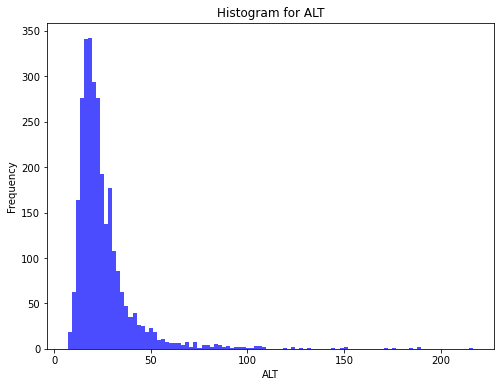

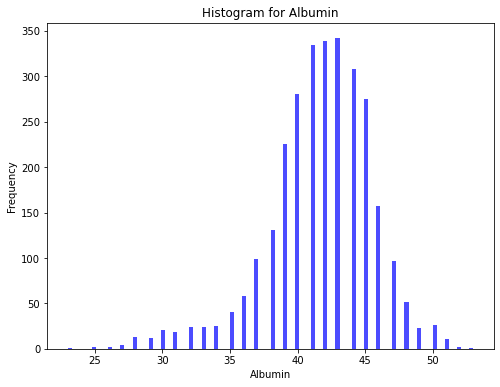

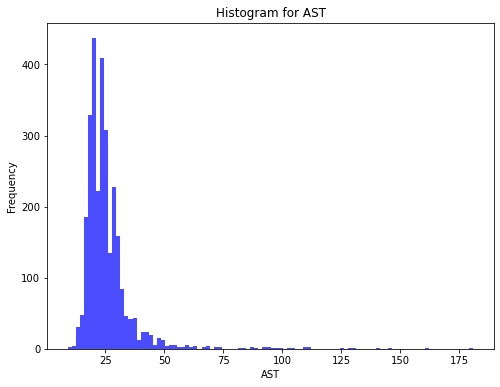

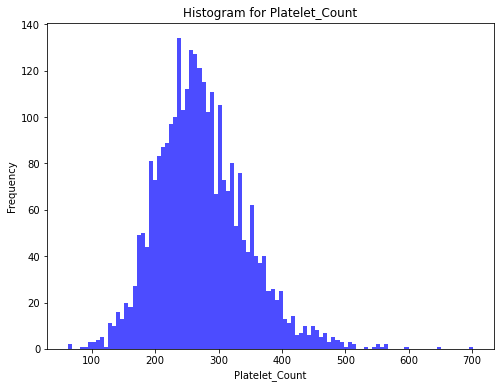

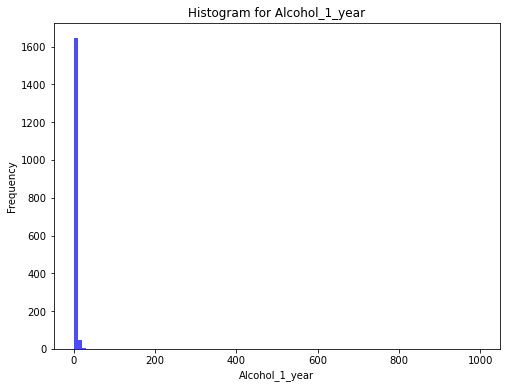

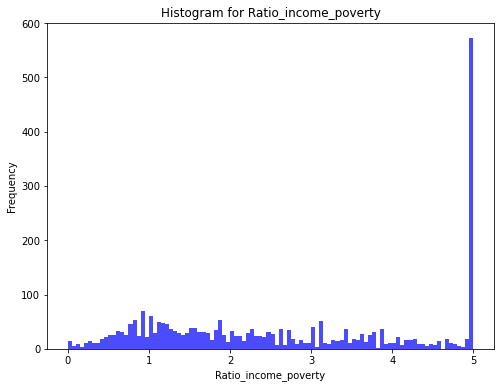

In [83]:
import matplotlib.pyplot as plt
continuous_columns = ['ALT', 'Albumin', 'AST', 'Platelet_Count', 'Alcohol_1_year', 'Ratio_income_poverty']

for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(nhanes0506[~nhanes0506[column].isna()][column], bins=100, color='blue', alpha=0.7)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [84]:
#Impute ALT, AST, PLT, PST with medians
#Impute income poverty ratio with PSU weighted means
#Impute Alcohol 1 year with weighted means
#Delete rows where Categorical features are missing

In [85]:
# Deleting records where categorical columns have missing values
categorical_columns = ['Education_level','Marital_status','liver_condition']

In [86]:
# Drop rows with missing values in specified categorical columns
nhanes0506 = nhanes0506.dropna(subset=categorical_columns)

In [87]:
#Imputing biochemistry variables
continuous_columns = ['ALT', 'Albumin', 'AST', 'Platelet_Count']

In [88]:
# Impute missing values with median
for column in continuous_columns:
    median_value = nhanes0506[column].median()
    nhanes0506[column].fillna(median_value, inplace=True)

In [89]:
#Imputing alcohol_1_year
alcohol_column = 'Alcohol_1_year'
weights_column = 'Two_year_interview_weight'  

In [90]:
# Calculate the weighted mean for Alcohol_1_year
weighted_mean = (nhanes0506[alcohol_column] * nhanes0506[weights_column]).sum() / nhanes0506[weights_column].sum()

In [91]:
# Impute missing values with the weighted mean for Alcohol_1_year
nhanes0506[alcohol_column].fillna(weighted_mean, inplace=True)

In [92]:
nhanes0506.columns

Index(['Respondent_sequence_number', 'Core_Antibody', 'Surface_Antigen',
       'Surface_Antibody', 'Vaccination', 'resp_2', 'Data_release_cycle',
       'Gender', 'Age', 'Race_Ethnicity', 'Veteran_Status', 'Country_of_birth',
       'Citizenship_status', 'Education_level', 'Marital_status',
       'Two_year_interview_weight', 'Two_year_MEC_weight',
       'Masked_variance_PSU', 'Masked_variance_stratum',
       'Ratio_income_poverty', 'No_Insurance', 'Private_Insurance',
       'Governement_Insurance', 'Alcohol_1_year', 'Health_care_1_year',
       'liver_condition', 'Blood_Transfusion', 'Hepatitis_C', 'ALT', 'Albumin',
       'AST', 'Platelet_Count'],
      dtype='object')

In [93]:
nhanes0506['concat'] = nhanes0506['Masked_variance_stratum'].astype(str) + '_' + nhanes0506['Masked_variance_PSU'].astype(str)

In [94]:
nhanes0506['product'] = nhanes0506['Ratio_income_poverty']*nhanes0506['Two_year_interview_weight']

In [95]:
nhanes0506_temp = nhanes0506.groupby('concat').sum()['product'].reset_index()

In [96]:
nhanes0506_temp_2 = nhanes0506.groupby('concat').sum()['Two_year_interview_weight'].reset_index()

In [97]:
nhanes0506_temp_3  = pd.merge(nhanes0506_temp, nhanes0506_temp_2, on="concat", how = "left")

In [98]:
nhanes0506_temp_3['rip'] = nhanes0506_temp_3['product']/nhanes0506_temp_3['Two_year_interview_weight']

In [99]:
nhanes0506_temp_4 = nhanes0506_temp_3[['concat','rip']]

In [100]:
nhanes0506 = pd.merge(nhanes0506,nhanes0506_temp_4, on='concat', how='left')

In [101]:
# Fill missing values in col_to_fill with mapping_value
nhanes0506['Ratio_income_poverty'] = nhanes0506['Ratio_income_poverty'].fillna(nhanes0506['rip'])

In [102]:
nhanes0506 = nhanes0506.drop(columns=['product','rip'])

In [103]:
nhanes0506 = nhanes0506.replace('Missing','No')


In [104]:
for i in list(nhanes0506.columns):
    print(i, ":", nhanes0506[(nhanes0506[i]=='missing') | (nhanes0506[i].isna())].shape[0]*100.0/nhanes0506.shape[0])

Respondent_sequence_number : 0.0
Core_Antibody : 0.0
Surface_Antigen : 0.0
Surface_Antibody : 0.0
Vaccination : 0.0
resp_2 : 0.0
Data_release_cycle : 0.0
Gender : 0.0
Age : 0.0
Race_Ethnicity : 0.0
Veteran_Status : 0.0
Country_of_birth : 0.0
Citizenship_status : 0.0
Education_level : 0.0
Marital_status : 0.0
Two_year_interview_weight : 0.0
Two_year_MEC_weight : 0.0
Masked_variance_PSU : 0.0
Masked_variance_stratum : 0.0
Ratio_income_poverty : 0.0
No_Insurance : 0.0
Private_Insurance : 0.0
Governement_Insurance : 0.0
Alcohol_1_year : 0.0
Health_care_1_year : 0.0
liver_condition : 0.0
Blood_Transfusion : 0.0
Hepatitis_C : 0.0
ALT : 0.0
Albumin : 0.0
AST : 0.0
Platelet_Count : 0.0
concat : 0.0


In [105]:
nhanes0506.shape

(2966, 33)